# Introduction
I have a younger cousin who enjoys playing computer games. My aunt, however, tries to limit his exposure to games as she believes there is a lot of inappropriate content for kids. I decided to gather data from ESRB website. The purpose is to identify how much of the adverse presence can be spotted in the current games.

# Data Collection
I gathered the information from the search part of the ESRB website. The following is the explanation of the data collected:

**Games**: The list of the games' names <br>
<br>
**Platforms**: The list of platforms that can be used to play the games (eg Play Station 4)<br>
<br>
**Content_Descriptors**: Information about the elements of the game such as: Violence, Blood, Sexuality, Nudity, Language, Substances, Gambling<br>
<br>
**Interactive_Elements**: The list specifying whether the game has any type of interactive elements<br>
<br>
**Ratings_Summary**: Short description of the game and the key elements of the game with respect to the infromation above

## Web Scraping

Importing necessary libraries 

In [1]:
from bs4 import BeautifulSoup
import bs4
import pandas as pd
from selenium import webdriver
import time
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

Creating empty lists for the informaiton to be stored in later and specifying the number of pages to go through, each page has 10 games. I decided to take a total of 300 games, hence, 30 pages.

In [2]:
games = []
platforms = [] 
content_descriptors = []
interactive_elements = []
ratings_summary = []

page = 1
page_max = 30

Using the while loop going through each of the pages and appending the data to the lists created.
Using webdriver sending a GET signal, obtaining the source of the page and then parsing it using BeautifulSoup.<br>
<br>
Each game information is located in a separate 'box' under the HTML class 'game'.
Looping through each 'game' class to find the data and append to the lists.

In [3]:
while page <= page_max:
        driver = webdriver.Chrome()
        time.sleep(5)
        driver.get(f"https://www.esrb.org/search/?searchKeyword=&platform=All%20Platforms&rating=E%2CE10%2B%2CT%2CM%2CAO&descriptor=Humor&pg={page}&searchType=All&ielement[]=UIN&ielement[]=IGP&ielement[]=IGPR")
        time.sleep(5)
        soup = BeautifulSoup(driver.page_source)
        time.sleep(5)
        for div in soup.findAll('div', attrs={'class':'game'}):
      
            game = ",".join(div.find('a'))
            platform = ",".join(div.find('div', attrs={'class':'platforms'}))

            all_tds = [i.get_text(strip=True) for i in div.findAll('td')]
            content_descriptor = all_tds[1]
            interactive_element = all_tds[2]
            rating_summary = all_tds[3]

            games.append(game)
            platforms.append(platform)            
            content_descriptors.append(content_descriptor)
            interactive_elements.append(interactive_element)
            ratings_summary.append(rating_summary)
            
        print(f"Finished with page {page}")
        page += 1

Finished with page 1
Finished with page 2
Finished with page 3
Finished with page 4
Finished with page 5
Finished with page 6
Finished with page 7
Finished with page 8
Finished with page 9
Finished with page 10
Finished with page 11
Finished with page 12
Finished with page 13
Finished with page 14
Finished with page 15
Finished with page 16
Finished with page 17
Finished with page 18
Finished with page 19
Finished with page 20
Finished with page 21
Finished with page 22
Finished with page 23
Finished with page 24
Finished with page 25
Finished with page 26
Finished with page 27
Finished with page 28
Finished with page 29
Finished with page 30


Creating a pandas dataframe

In [4]:
dataframe = pd.DataFrame()
dataframe["Game"] = games
dataframe["Platform"] = platforms
dataframe["Content_Descriptor"] = content_descriptors
dataframe["Interactive_Elements"] = interactive_elements
dataframe["Ratings_Summary"] = ratings_summary

dataframe

,Game,Platform,Content_Descriptor,Interactive_Elements,Ratings_Summary
0,Horse Tales: Emerald Valley Ranch,"PlayStation 4, PlayStation 5, Nintendo Switch",No Descriptors,No Interactive Elements,This is an adventure/management game in which ...
1,Airborne Kingdom,"PlayStation 4, Nintendo Switch",No Descriptors,No Interactive Elements,No Rating Summary
2,DARQ Ultimate Edition,"PlayStation 4, PlayStation 5, Nintendo Switch,...","Mild Blood,Mild Language,Use of Tobacco,Violence",No Interactive Elements,This is a puzzle platformer in which players a...
3,The Outbound Ghost,"PlayStation 4, PlayStation 5, Nintendo Switch",Fantasy Violence,No Interactive Elements,This is an adventure role-playing game in whic...
4,Apico,"PlayStation 4, PlayStation 5, Nintendo Switch",No Descriptors,No Interactive Elements,No Rating Summary
...,...,...,...,...,...
295,Behind the Frame: The Finest Scenery,"PlayStation 4, Nintendo Switch",No Descriptors,No Interactive Elements,No Rating Summary
296,Hidden Objects Collection Volume 3,Nintendo Switch,"Mild Blood,Mild Language,Mild Violence,Use of ...",No Interactive Elements,This is a collection of hidden-object games in...
297,Fishing: North Atlantic,PlayStation 5,Mild Blood,No Interactive Elements,No Rating Summary
298,Shantae: Half-Genie Hero Ultimate Edition,PlayStation 5,"Cartoon Violence,Suggestive Themes",No Interactive Elements,No Rating Summary


Saving the dataframe as a CSV file with the index column included (index = True).
This step is not mandatory, it is done to simply save the dataframe.

In [5]:
dataframe.to_csv("Games_vf.csv", index = True)

# Visual Represenation

#### Now that I have the dataframe, I will calculate the relevant percentages to show the information in the format of graphs.

From the snapshot above it seems that no game has interactive elements, below is the line to check that.

In [7]:
dataframe["Interactive_Elements"].value_counts()

No Interactive Elements    300
Name: Interactive_Elements, dtype: int64

Checking the percentage of games that include the elements of violence.

In [8]:
violence = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Violence")])/(page_max*10))*100

In [9]:
# Blood
blood = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Blood")])/(page_max*10))*100

In [10]:
# Sexuality
sexuality = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Sexual|Suggestive Themes")])/(page_max*10))*100

In [11]:
# Nudity
nudity = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Nudity")])/(page_max*10))*100

In [12]:
# Bad language
language = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Language|Lyrics")])/(page_max*10))*100

In [13]:
# Substances
substances = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Tobacco|Alcohol|Drug")])/(page_max*10))*100

In [14]:
# Gambling
gambling = (len(dataframe[dataframe["Content_Descriptor"].str.contains("Gambling")])/(page_max*10))*100

In [15]:
# No Descriptors
no_descriptors = (len(dataframe[dataframe["Content_Descriptor"].str.contains("No Descriptors")])/(page_max*10))*100

Inserting a bar plot for the visual representation

C:\Users\Kristina Abraamyan\AppData\Local\Temp\ipykernel_24132\983933100.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([str(i) +"%" for i in list(range(0,100,10))])
C:\Users\Kristina Abraamyan\AppData\Local\Temp\ipykernel_24132\983933100.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(descriptors, rotation =45)


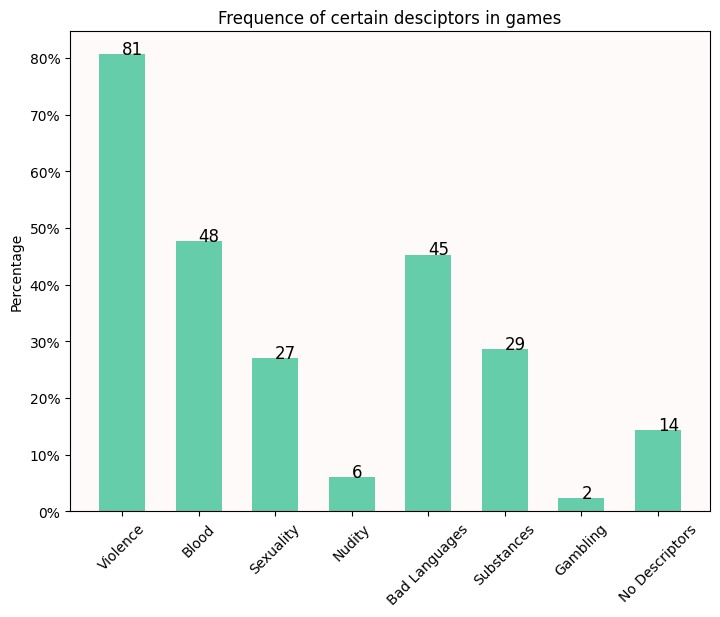

In [16]:
chart = plt.figure()
axes = chart.add_axes([0,0,1,1])

descriptors = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Languages', 'Substances', 'Gambling', 'No Descriptors']
percentage = [violence, blood, sexuality, nudity, language, substances, gambling, no_descriptors]
axes.bar(descriptors, percentage, width = 0.6, color = 'mediumaquamarine')

axes.set_facecolor('snow')

axes.set_ylabel('Percentage')

# Changing the way labels are represented
axes.set_yticklabels([str(i) +"%" for i in list(range(0,100,10))])
axes.set_xticklabels(descriptors, rotation =45)
axes.set_title('Frequence of certain desciptors in games')

# Adding the callouts. '{:.2%}'.format(variable) tells python to express the variable in the format of percentage with 2 decimal places
for index in range(len(descriptors)):
  axes.text(descriptors[index], percentage[index], round(float('{:}'.format(percentage[index]))), size=12)

plt.show()

Based on the plot it becomes clear that 71% of the sample games include some extent of violence, 42% mention blood and 41% use bad language. The data so far demonstrates that large percentage of games include factors that may negatively impact a person.

# Platform Analysis
#### Now I would like to see whether playing on a specific platoform suggests greater exposure to the negative influence of the "descriptors".

In [17]:
platf_list=[]
# dataframe["Platform"].value_counts()
for y in dataframe['Platform']:
    if (",") not in y:
        platf_list.append(y)
        
# Converting the list into a dictionary to keep the unique values only and making a list out of it
unique_plt=list(set(platf_list))
unique_plt

['Nintendo Switch',
 'PlayStation 5',
 'Stadia',
 'Xbox One',
 'PlayStation 4',
 'Meta Quest 2',
 'Plug-and-Play',
 'Windows PC']

Finding percentages corresponding to each platform:
- I noticed that there would be too many percentages needed for this analysis. In order to automate it I created a list with the descriptors that I need to use<br>
<br>
- In total I will have 8 x 8 = 64 percentages because there are 8 distinct platforms and 8 distinct descriptors: I am iterating over each platform to gather the percentages<br>
<br>
- To organise percentages and remember what descriptor each percentage belongs to I create a list of tuples, with the descriptor and percentage<br>
<br>
- I then save the information from the list in the new table with two columns<br>
<br>
- I find the length of the list with descriptors to add a new platform column to the table. This column has repeated values because for each platform I need to find the percentage by descriptor - so a total of 8 percentages per platform

In [18]:
list_with_contains_parameters=['Violence', 'Blood', 'Sexual|Suggestive Themes', 'Nudity', 'Language|Lyrics', 'Tobacco|Alcohol|Drug', 'Gambling', 'No Descriptors']

list_final=[]
for each_pltf in unique_plt:
    for each_p in list_with_contains_parameters:
        list_final.append((each_p,(len(dataframe[dataframe["Content_Descriptor"].str.contains(each_p)][dataframe["Platform"].str.contains(each_pltf)])/(page_max*10))*100))
        
table = pd.DataFrame(list_final, columns = ["Descr", "Perctg"])

length = len(list_with_contains_parameters)
list_with_platforms_repeated_length_times = [elm for elm in unique_plt for times in range(length)]

table['Pltfrms'] = list_with_platforms_repeated_length_times
table

C:\Users\Kristina Abraamyan\AppData\Local\Temp\ipykernel_24132\1672583842.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  list_final.append((each_p,(len(dataframe[dataframe["Content_Descriptor"].str.contains(each_p)][dataframe["Platform"].str.contains(each_pltf)])/(page_max*10))*100))


,Descr,Perctg,Pltfrms
0,Violence,55.000000,Nintendo Switch
1,Blood,29.666667,Nintendo Switch
2,Sexual|Suggestive Themes,17.333333,Nintendo Switch
3,Nudity,4.666667,Nintendo Switch
4,Language|Lyrics,29.333333,Nintendo Switch
...,...,...,...
59,Nudity,1.666667,Windows PC
60,Language|Lyrics,12.666667,Windows PC
61,Tobacco|Alcohol|Drug,7.333333,Windows PC
62,Gambling,0.666667,Windows PC


Plotting the bar charts for every platform

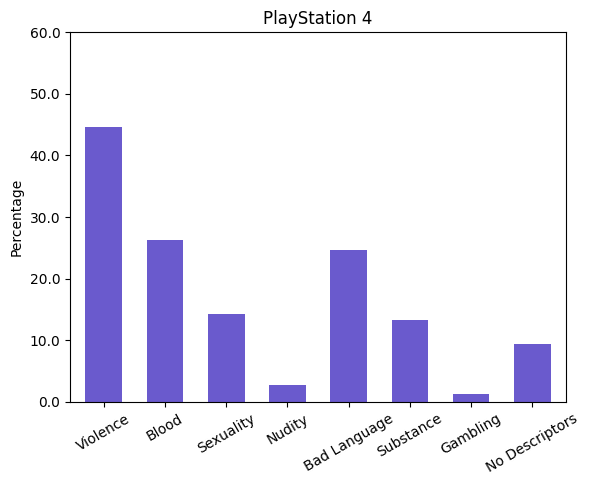

In [19]:
table.query('Pltfrms=="PlayStation 4"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'slateblue')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']
'Pltfrms=="PlayStation 4"'
# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("PlayStation 4")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

The number of times PlayStation 4 appears amongst the games:

In [20]:
print(str(len(dataframe[dataframe["Platform"].str.contains("PlayStation 4")])) + " out of " + str(page_max*10) + " times")

167 out of 300 times


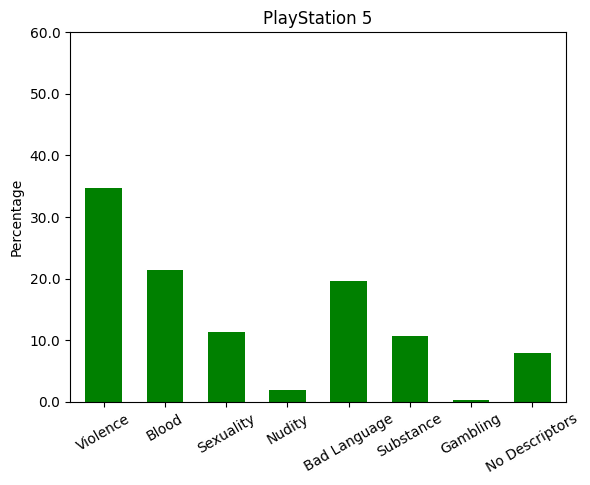

In [21]:
table.query('Pltfrms=="PlayStation 5"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'g')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("PlayStation 5")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [22]:
print(str(len(dataframe[dataframe["Platform"].str.contains("PlayStation 5")])) + " out of " + str(page_max*10) + " times")

131 out of 300 times


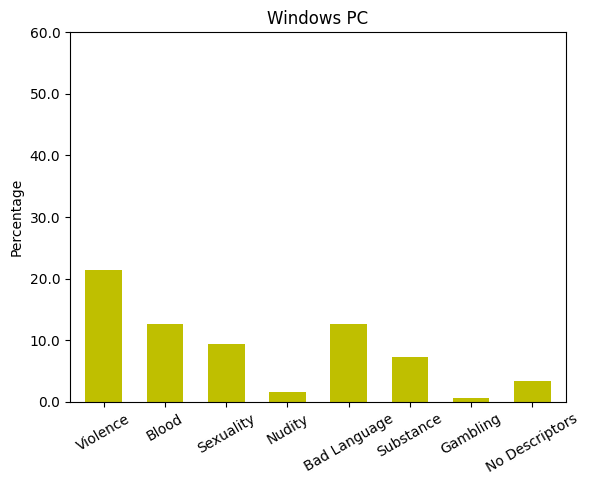

In [23]:
table.query('Pltfrms=="Windows PC"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'y')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Windows PC")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [24]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Windows PC")])) + " out of " + str(page_max*10) + " times")

76 out of 300 times


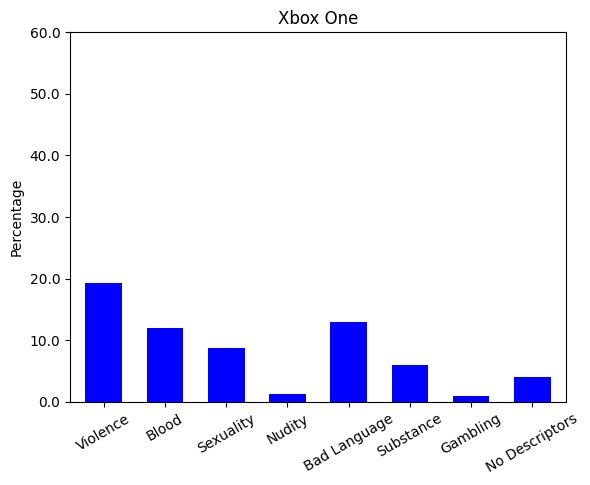

In [25]:
table.query('Pltfrms=="Xbox One"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'b')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Xbox One")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [26]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Xbox One")])) + " out of " + str(page_max*10) + " times")

72 out of 300 times


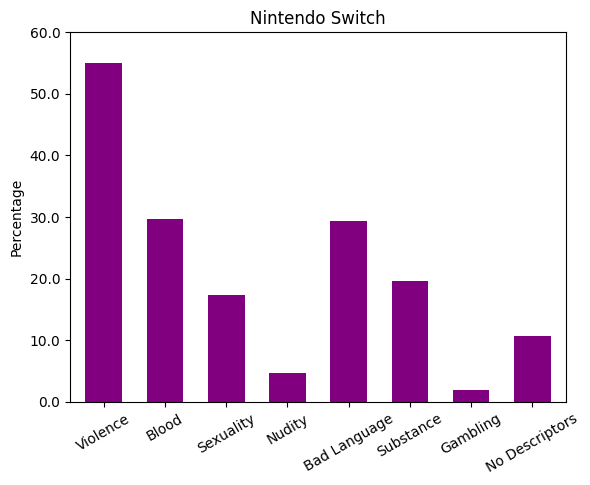

In [27]:
table.query('Pltfrms=="Nintendo Switch"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'purple')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Nintendo Switch")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [28]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Nintendo Switch")])) + " out of " + str(page_max*10) + " times")

208 out of 300 times


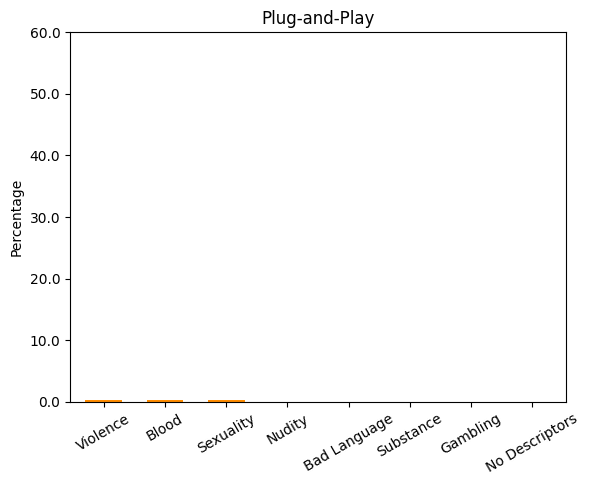

In [29]:
table.query('Pltfrms=="Plug-and-Play"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'darkorange')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Plug-and-Play")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [30]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Plug-and-Play")])) + " out of " + str(page_max*10) + " times")

1 out of 300 times


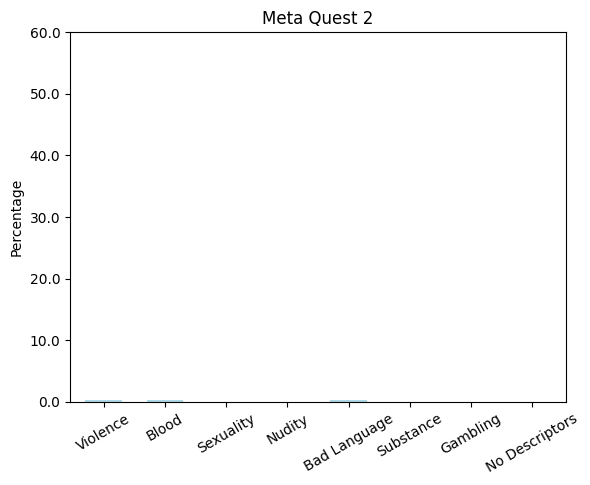

In [31]:
table.query('Pltfrms=="Meta Quest 2"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'lightblue')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Meta Quest 2")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [32]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Meta Quest 2")])) + " out of " + str(page_max*10) + " times")

1 out of 300 times


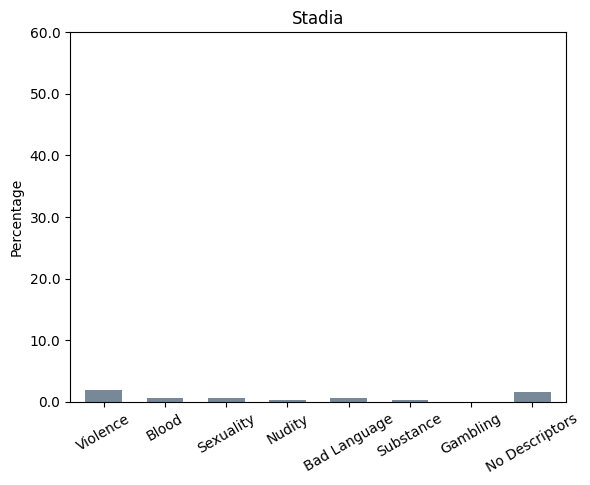

In [33]:
table.query('Pltfrms=="Stadia"').plot(kind = "bar", x = 'Descr', y = 'Perctg',width = 0.6, color = 'lightslategray')
custom_x = ['Violence', 'Blood', 'Sexuality', 'Nudity', 'Bad Language', 'Substance', 'Gambling', 'No Descriptors']

# Changing the way labels are represented
plt.xticks([0,1,2,3,4,5,6,7], custom_x, rotation=30)
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
plt.ylabel('Percentage')
plt.xlabel('')
plt.title("Stadia")
plt.ylim(0,60)

plt.legend().remove()

plt.show()

In [34]:
print(str(len(dataframe[dataframe["Platform"].str.contains("Stadia")])) + " out of " + str(page_max*10) + " times")

11 out of 300 times


## Preliminary conclusion
Based on the platforms information above, it can be seen that Nintendo Switch, PlayStation 4, and PlayStation 5 are the platforms that are most used by the players. The violence and bad language are highly present amongst these platform categories with roughly 50%, 45% and 35% precence of violence in these platforms respectively and with 30%, 25%, 20% presence of bad language.<br>
<br>Platforms such as Stadia, Meta Quest 2 and Plug-and-Play are least popular amongst the game services providers. Therefore they do not include large percentages of the Violence presence relative to other platforms.<br>
<br>Descriptors such as Nudity and Gambling are least present amongst all categories of platforms. This is supported by the first diagram on the "Frequence of certain desciptors in games". 

# Conclusion

Although the analysis is only based on a sample of 300 games, it is still able to provide the answers to the questions I originally had. The data shows that Violence is present at the level of 81% in the sampled games. 45% of the desciptors are related to Bad Language usage in the games.<br>
<br>On the per platform basis, Nintendo Switch had the highest proportion of Violence and Bad Language in the games simply due to the fact that Nintendo Switch games are more popular than for instance Windows PC games. Regardless of the platform category, Violence and Bad Language remained the most frequent descriptors. This suggests that there is potentially no link between the platform and the amount of Violence / Bad Language in the games. <br>
<br>Overall, I can see that there is a strong presence of the Violence and Bad Language descriptors across all the games and all the platforms in the sample size. Therefore, there is a high probability that my aunt was correct in thinking that games would have negative impact my cousin's mental state.